INFO:root:Total parameters: 109954
100%|██████████| 32/32 [00:00<00:00, 61.67it/s]
INFO:root:Epoch:0, train loss: 0.9104810072437043, train accuracy: 0.8625916870415649, elapsed: 0.5288403034210205 sec.
100%|██████████| 32/32 [00:00<00:00, 363.74it/s]
INFO:root:Epoch:1, train loss: 0.5595454081455364, train accuracy: 0.8963325183374083, elapsed: 0.09807467460632324 sec.
100%|██████████| 32/32 [00:00<00:00, 366.30it/s]
INFO:root:Epoch:2, train loss: 0.41520072081456055, train accuracy: 0.9046454767726162, elapsed: 0.10151886940002441 sec.
100%|██████████| 32/32 [00:00<00:00, 343.67it/s]
INFO:root:Epoch:3, train loss: 0.3816360932069093, train accuracy: 0.8982885085574572, elapsed: 0.10218095779418945 sec.
100%|██████████| 32/32 [00:00<00:00, 381.72it/s]
INFO:root:Epoch:4, train loss: 0.309743774289684, train accuracy: 0.9246943765281174, elapsed: 0.09289121627807617 sec.
100%|██████████| 32/32 [00:00<00:00, 380.64it/s]
INFO:root:Epoch:5, train loss: 0.2866242563491285, train accuracy: 0

Roc Score Area under the curve 0.9821886646338511


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Nirmala.ttf', name='Nirmala UI', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoesc.ttf', name='Segoe Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisli.ttf', name='Segoe UI', style='italic', variant='normal', weight=350, stretch='normal', size='scalable')) = 11.0975
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GARA.TTF', name='Garamond', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRSCRIPT.TTF', name='French Script MT', style='normal', variant='normal', weight=400, stretch='

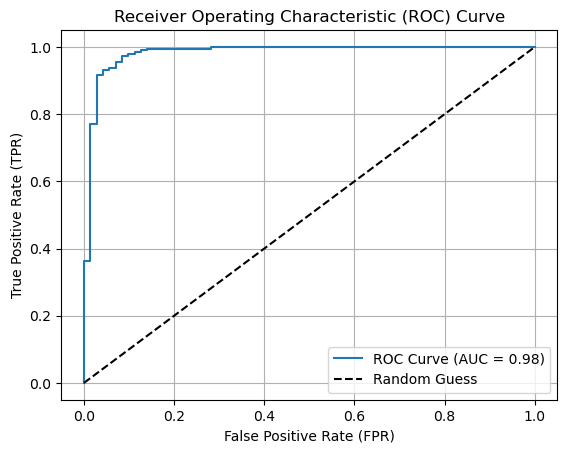

In [3]:
import logging

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mla.metrics.metrics import mean_squared_error
from mla.neuralnet import NeuralNet
from mla.neuralnet.constraints import MaxNorm
from mla.neuralnet.layers import Activation, Dense, Dropout
from mla.neuralnet.optimizers import Adadelta, Adam
from mla.neuralnet.parameters import Parameters
from mla.neuralnet.regularizers import L2
from mla.utils import one_hot
import pandas as pd
from mla.neuralnet.layers.recurrent import LSTM, RNN
logging.basicConfig(level=logging.DEBUG)


def classification():
    # Generate a random binary classification problem.
    dataset_path = "d:/JuniorAI/Benchmarking-ML-Algorithms-/class_imbalance/class_imbalance/dataset_312_scene.csv"
    data = pd.read_csv(dataset_path)

    # Supondo que o dataset tenha colunas 'features' e 'target'
    X = data.iloc[:, :-1].values  # Todas as colunas menos a última como features
    y = data.iloc[:, -1].values   # Última coluna como target
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    rnn_layer = LSTM(128, return_sequences=False)
    y = one_hot(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1111)

    model = NeuralNet(
        layers=[
            Dense(256, Parameters(init="uniform", regularizers={"W": L2(0.05)})),
            Activation("relu"),
            Dropout(0.5),
            Dense(128, Parameters(init="normal", constraints={"W": MaxNorm()})),
            Activation("relu"),
            Dense(2),
            Activation("softmax"),
        ],
        loss="categorical_crossentropy",
        optimizer=Adadelta(),
        metric="accuracy",
        batch_size=64,
        max_epochs=25,
    )
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    auc_score = roc_auc_score(y_test[:, 0], predictions[:, 0])  # Calculate AUC
    print("Roc Score Area under the curve", auc_score)
    fpr, tpr, thresholds = roc_curve(y_test[:, 0], predictions[:, 0])

    # Plot FPR vs TPR
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc_score))  # Use AUC score here
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


def regression():
    # Generate a random regression problem
    X, y = make_regression(n_samples=5000, n_features=25, n_informative=25, n_targets=1, random_state=100, noise=0.05)
    y *= 0.01
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

    model = NeuralNet(
        layers=[
            Dense(64, Parameters(init="normal")),
            Activation("linear"),
            Dense(32, Parameters(init="normal")),
            Activation("linear"),
            Dense(1),
        ],
        loss="mse",
        optimizer=Adam(),
        metric="mse",
        batch_size=256,
        max_epochs=15,
    )
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("regression mse", mean_squared_error(y_test, predictions.flatten()))



classification()